In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 12})

# Setup

In [2]:
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
colors = ["#324F61", "#286F74", "#348F79", "#62AD70", "#A3C663", "#EFD85F",]

# File Reading

In [3]:
# Read a file containing one array
def read_file(filename, timeframe="ns"):
    arr = []
    f = open(filename, "r")

    for line in f:
        meas = float(line.replace("\n", ""))
        if timeframe == "ns": 
            arr.append(meas/1000000)
        if timeframe == "ms":
            arr.append(meas)
    
    return np.array(arr)

# Plots

In [4]:
def loglogplot(x, y, xlabel, ylabel):
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    ax.loglog(x, y, '.', alpha=loglogalpha, color=colors[3])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()

def boxplot(x, labels, ylabel, title, showfliers=True, yscale="log"):
    fig, ax = plt.subplots()

    plt.ylabel(ylabel)
    plt.title(title)
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.boxplot(x, labels=labels, notch=True, showfliers=showfliers)

def violinplot(x, yscale="log"): # TODO: Maybe check out how to remove the outliers or try seaborn
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.violinplot(x)

def hbtbplot(hb_t, tb_t, names, i_color=0):
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    index = np.arange(len(names))
    bar_width = 0.35

    if i_color >= 4:
        i_color = 0

    rectsHB = plt.bar(index, hb_t, bar_width, alpha=baralpha, color=colors[i_color], label="DCHB")
    rectsTB = plt.bar(index + bar_width, tb_t, bar_width, alpha=baralpha, color=colors[i_color+2], label="DCTB")

    plt.xlabel("Engine")
    plt.ylabel("Total time")
    plt.title("Engines times")
    plt.xticks(index + bar_width/2, names)
    plt.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.tight_layout()
    plt.show()

# Determinant of the Covariance Matrix Computation Time 

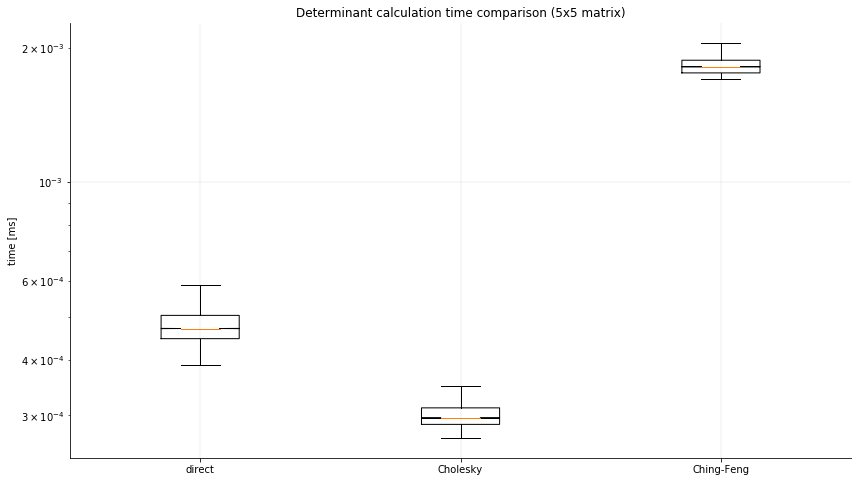

In [7]:
file_names = ["m001", "m002", "m003", "m004", "m005", "m006", "m007", "m008", "m009", "m010", 
              "m020", "m030", "m040", "m050", "m060", "m070", "m080", "m090", "m100"]
labels = ["n=1",  "n=2",  "n=3",  "n=4",  "n=5",  "n=6",  "n=7",  "n=8",  "n=9", "n=10", 
          "n=20", "n=30", "n=40", "n=50", "n=60", "n=70", "n=80", "n=90", "n=100"]

org_arr = []
for file_name in ["org_det_ss-10e5/" + s + ".txt" for s in file_names]:
    org_arr.append(read_file(file_name))

cho_arr = []
for file_name in ["cho_det_ss-10e5/" + s + ".txt" for s in file_names]:
    cho_arr.append(read_file(file_name))

f_arr = []
for file_name in ["f_det_ss-10e5/" + s + ".txt" for s in file_names]:
    f_arr.append(read_file(file_name))

ylabel = "time [ms]"

# title = "Determinant calculation of a nxn matrix through direct calculation"
# boxplot(org_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(org_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(org_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

# title = "Determinant calculation of a nxn matrix through the Cholesky decomposition"
# boxplot(cho_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(cho_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(cho_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

# title = "Determinant calculation of a nxn matrix through the Ching-Feng formula"
# boxplot(f_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(f_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(f_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

title = "Determinant calculation time comparison (5x5 matrix)"
boxplot([org_arr[4], cho_arr[4], f_arr[4]], ["direct", "Cholesky", "Ching-Feng"], ylabel, title, showfliers=False, yscale="log")

# Engine Times



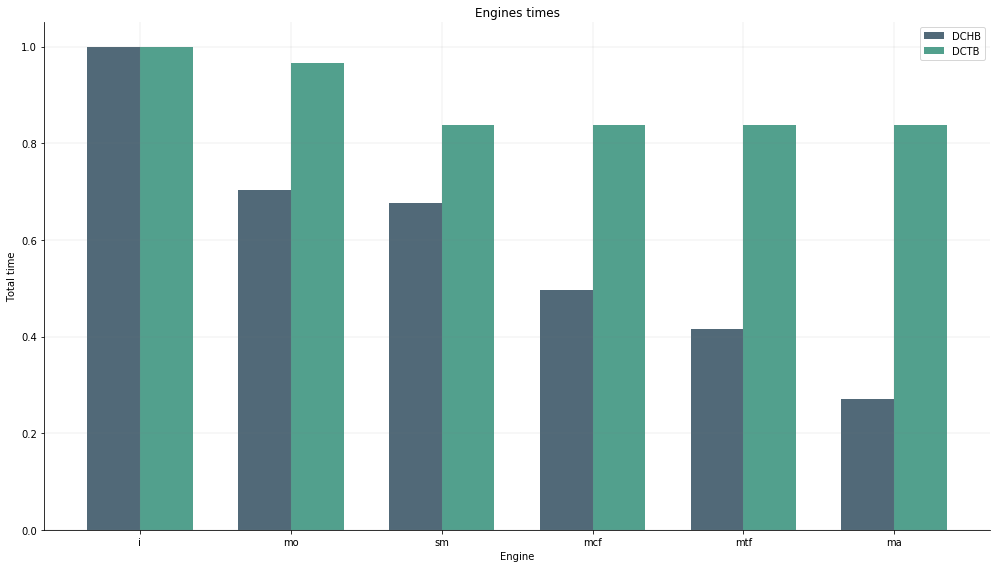

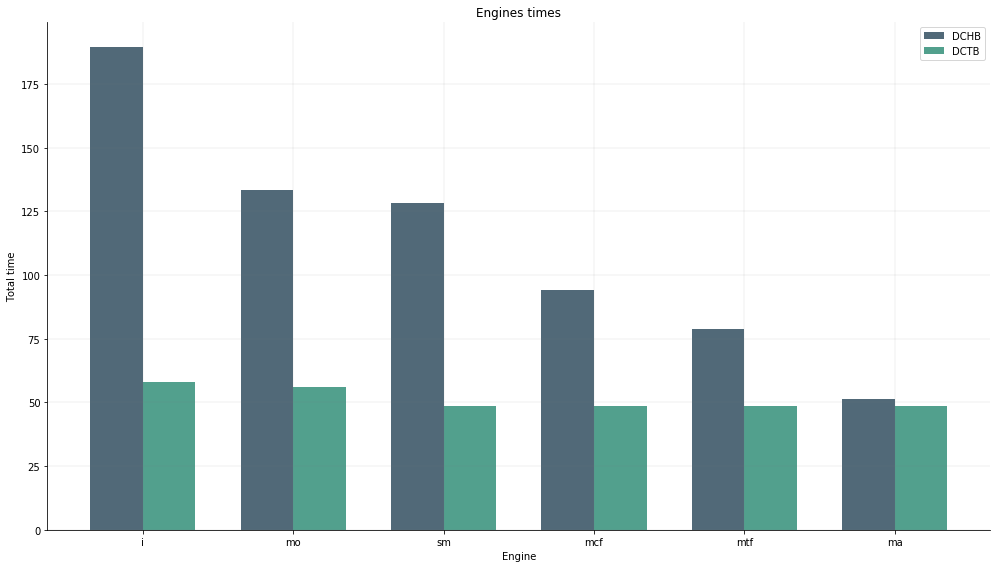

In [6]:
versions = ["i", "mo", "sm", "mcf", "mtf", "ma"]
hb_t     = np.array([189.75, 133.52, 128.49, 94.27, 78.66, 51.18])
tb_t     = np.array([ 58.18,  56.24,  48.78, 48.78, 48.78, 48.78])

# TODO: Start with this plot in my thesis when comparing versions
hbtbplot(hb_t/hb_t[0], tb_t/tb_t[0], versions, i_color=0)
hbtbplot(hb_t, tb_t, versions, i_color=0)